# T05. Analiza prin transformata Fourier

# Analiza în domeniul frecvenței

Până în prezent, toate procesările făcute asupra semnalului vocal au fost realizate în domeniul timp. Și, deși în anumite cazuri este suficient, în aplicații de prelucrare și analiză a semnalului vocal, este necesar să ne uităm și la reprezentarea din domeniul frecvență.

În 1822, Jean Baptiste Joseph Fourier (1768-1839) a introdus o metodă de descriere a oricărei funcții matematice folosind funcții trigonometrice simple. Această metodă este denumită **Transformata Fourier** și repezintă baza tuturor analizelor în frecvență.

Cu toate acestea, reprezentarea în frecvență nu este un concept pur matematic, deoarece urechea umană realizează o descompunere similară a sunetului. Cilii aparatului Corti reacționează în mod diferit la frecvențele sunetelor. Frecvențele înalte sunt prelucrate de cilii apropiați de membrana bazilară, iar frecvențele joase de cilii apropiați de apexul cohlear.

În următoarele secțiuni vom încerca să calculăm și să vizualizăm transformata Fourier a semnalelor vocale și vom introduce și una dintre cele mai importante aplicații ale acesteia, **spectrograma**.

Haideți să începem! Dacă dorim să reprezentăm un semnal în frecvență, mai întâi trebuie să-l citim.

În acest tutorial vom folosi 2 vocale rostite de aceeași persoană:

In [1]:
import wave
import numpy as np

########################
# Citim prima vocală
########################
input_wav_file_1 = 'speech_files/adr_e1.wav'
wav_struct_1 = wave.open(input_wav_file_1, 'r')
wav_bytes_1 = wav_struct_1.readframes(-1)
wav_data_1 = np.frombuffer(wav_bytes_1, dtype='int16')
wav_data_1 = wav_data_1/float(max(abs(wav_data_1)))


########################
# Citim a doua vocală
########################
input_wav_file_2 = 'speech_files/adr_e2.wav'
wav_struct_2 = wave.open(input_wav_file_2, 'r')
wav_bytes_2 = wav_struct_2.readframes(-1)
wav_data_2 = np.frombuffer(wav_bytes_2, dtype='int16')
wav_data_2 = wav_data_2/float(max(abs(wav_data_2)))

# Ambele fișiere au aceeași parametri, astfel că
# îi extragem o singură dată
sampling_frequency = wav_struct_1.getframerate()
bit_depth = wav_struct_1.getsampwidth()
no_channels = wav_struct_1.getnchannels()

# Închidem fluxurile de citire
wav_struct_1.close()
wav_struct_2.close()

... afișăm și ascultăm semnalele:

Duration of the first file: 0.062250 second(s)
Duration of the first file: 0.050125 second(s)


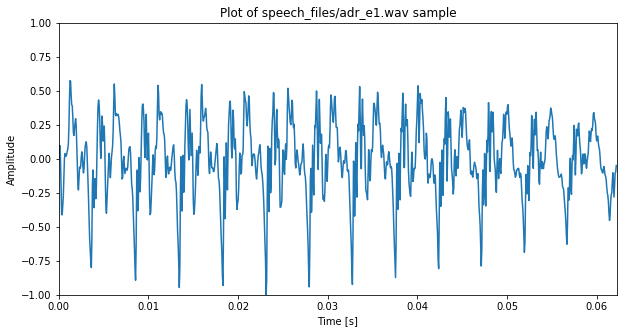

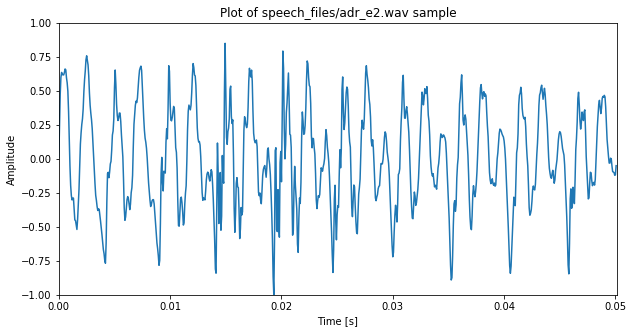

In [2]:
import matplotlib.pylab as pl
%matplotlib inline

########################
# Afișăm primul semnal
########################
pl.figure(figsize=[10,5])
time_axis = np.arange(0, len(wav_data_1))\
    *1.00/sampling_frequency
duration_1 = len(wav_data_1)*1.00/sampling_frequency
print ("Duration of the first file: %f second(s)" \
        %duration_1)
pl.plot(time_axis, wav_data_1)
pl.xlim([0, duration_1])
pl.ylim([-1, 1])
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')
pl.title("Plot of %s sample" %input_wav_file_1)


########################
# Afișăm al doilea semnal
########################
pl.figure(figsize=[10,5])
time_axis = np.arange(0, len(wav_data_2))\
    *1.00/sampling_frequency
duration_2 = len(wav_data_2)*1.00/sampling_frequency
print ("Duration of the first file: %f second(s)"\
        %duration_2)
pl.plot(time_axis, wav_data_2)
pl.xlim([0, duration_2])
pl.ylim([-1, 1])
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')
A = pl.title("Plot of %s sample" %input_wav_file_2)

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex2.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">A. Cele două fișiere conțin aceeași vocală?
    </td>
</tr>
</table>

>Răspunsul vostru...

Să le ascultăm...

In [3]:
import IPython
IPython.display.Audio(wav_data_1, rate=sampling_frequency)

In [4]:
IPython.display.Audio(wav_data_2, rate=sampling_frequency)

S-ar putea ca un context al celor două vocale să fie mai de ajutor. Codul de mai jos afișează și redă segmentul de voce din care au fost extrase vocalele:

Duration of the context file: 0.425438 second(s)


Text(0.282, 0.8, 'Second sample')

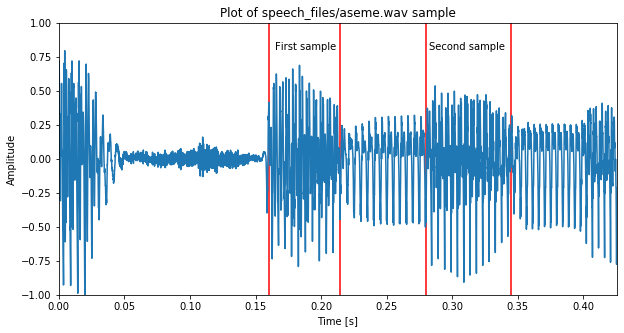

In [5]:
# Citim segmentul vocal
input_wav_file_context = 'speech_files/aseme.wav'
wav_struct_context = wave.open(input_wav_file_context, 'r')
wav_bytes_context = wav_struct_context.readframes(-1)
wav_data_context = np.frombuffer(wav_bytes_context,\
                                 dtype='int16')
wav_data_context = wav_data_context \
            /float(max(abs(wav_data_context)))
sampling_frequency_context = \
    wav_struct_context.getframerate()

pl.figure(figsize=[10,5])
time_axis = np.arange(0, len(wav_data_context))\
    *1.00/sampling_frequency
duration_context = len(wav_data_context)\
    *1.00/sampling_frequency
print ("Duration of the context file: %f second(s)" \
       %duration_context)

pl.plot(time_axis, wav_data_context)
pl.xlim([0, duration_context])
pl.ylim([-1, 1])
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')
pl.title("Plot of %s sample" %input_wav_file_context)
pl.vlines([0.16,0.214, 0.28, 0.345], -1, 1, 'r')
pl.text(0.165,0.80,'First sample')
pl.text(0.282,0.80,'Second sample')

Și îl redăm:

In [6]:
IPython.display.Audio(wav_data_context, rate=sampling_frequency_context)

Se pare că, deși cele două fișiere conțin același semnal, formele lor de undă nu sunt similare. Atunci cum am putea să facem de exemplu recunoașterea vorbirii dacă există atât de multă variabilitate chiar și la nivel de fonem pentru același vorbitor în cadrul aceluiași cuvânt?

Răspunsul este să utilizăm o transformată de spațiu ce uniformizează această variabilitate. Această transformată este transformata în domeniul frecvenței, și anume **transformata Fourier (TF)**. TF este o transformată ce permite reprezentarea oricărui semnal periodic ca o sumă de funcții trigonometrice: sinus și cosinus. Aceasta înseamnă că orice semnal periodic poate fi descompus într-un set de componente sinusoidale cu amplitudini, faze și frecvențe fundamentale diferite. 

Transformata Fourier de bază operează asupra semnalelor sau funcțiilor continue. În cazul nostru, semnalele fiind digitizate, vom folosi transformata Fourier discretă și algoritmi de calcul rapid ai coeficienților denumiți colectiv **transformata Fourier rapidă**. 


## Transformata Fourier Discretă

**Transformata Fourier discretă** este definită astfel: 

>$X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-\frac{2 \pi i}{N}kn} $ = $ \sum_{n=0}^{N-1} x_n \left [ \cos (\frac {2\pi k n}{N} ) - i \cdot \sin (\frac{2\pi kn}{N})  \right ]$  


Fiecare coeficient $X_k$ reprezintă un număr complex ce înglobează amplitudinea și faza unei componente sinusoidale complexe a semnalului $x_n$. Frecvența sinusoidei este de $k$ ciclii per $N$ eșantioane. Iar amplitudinea și faza ei sunt:


>$\left | X_k \right |/N = \sqrt {R(X_k)^2 + Im(X_k)^2}/N$


>$arg(X_k) = atan2(Im(X_k),Re(X_k)) = -i*ln ( \frac {X_k}{\left | X_k \right |})$

unde $atan2$ este varianta cu două argumente a funcției arctangentă. Dacă secvența de intrare este reală, atunci coeficienții sunt simetrici.



## Transformata Fourier Rapidă - en. Fast Fourier Transform (FFT)##

Calculul coeficienților Fourier ridică probleme atunci când resursele de calcul sunt limitate. Acest fapt restrânge aplicabilitatea algoritmului pentru procesări în timp real. Fiind esențial atunci să se dezvolte algoritmi eficienți, rapizi și exacți pentru calculul acestor coeficienți. Totalitatea acestor algoritmi este denumită **Transformata Fourier Rapidă - en. Fast Fourier Transforms (FFT)** și include un număr mare de metode. Cele mai cunoscute și utilizate sunt cele cu **decimare în timp** și **decimare în frecvență**. Ambele metode implică descompunerea calculului coeficienților până la un nivel de 2 eșantioane și recombinarea rezultatelor parțiale. Astfel că, în aplicații practice, lungimea semnalelor discrete asupra cărora se aplică FFT trebuie să fie o putere a lui 2. Dacă această condiție nu este îndeplinită, datele de intrare sunt completate cu zero (en. *zero-padded*)

În cele ce urmează vom aplica FFT asupra a două semnale: un sinus și un semnal vocal pentru a înțelege mai bine ce reprezintă coeficienții Fourier și analiza spectrală:

### FFT sinus

Să analizăm mai întâi un semnal mai simplu - un sinus, pentru a înțelege FFT mai ușor. Vom utiliza pentru calculul FFT o funcție disponibilă în modulul  `scipy`.

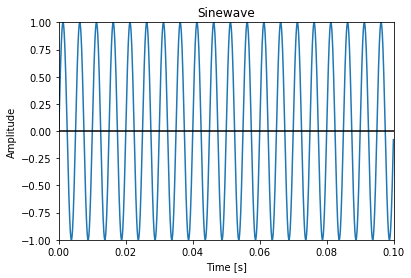

In [7]:
# Generăm un sinus
volume = 0.5     # domeniu [0.0, 1.0]
fs = 16000       # frecvența de eșantionare în Hz
duration = 0.1   # durata în secunde
f = 200.0        # frecvența sinusului

# Generăm eșantioanele
sinewave = (np.sin(2*np.pi*np.arange(fs*duration)\
                   *f/fs)).astype(np.float32)


# Afișăm sinusul
time_axis = np.arange(0, len(sinewave))*1.00/fs
pl.plot(time_axis, sinewave)
pl.xlim([0, duration])
pl.ylim([-1, 1])
pl.title('Sinewave')
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')
pl.axhline(y=0, color='k');


In [8]:
# Calculăm transformata Fourier rapidă a sinusului
from scipy.fftpack import fft, fftshift

sine_fft = fft(sinewave, len(sinewave)) \
            / (len(sinewave)/2.0)

# Afișăm primii 10 coeficienți FFT
print ('\n'.join(["Coef #"+str(i+1).zfill(2)+":"+str(x) \
                  for i,x in enumerate(sine_fft[:10])]))

Coef #01:(1.490116e-09+0j)
Coef #02:(5.1729072e-11+7.11989e-11j)
Coef #03:(2.7359465e-10+8.88962e-11j)
Coef #04:(2.78754e-10-9.057253e-11j)
Coef #05:(5.5597055e-11-7.65227e-11j)
Coef #06:(1.1744019e-08+1.03235545e-08j)
Coef #07:(6.128793e-11+8.435567e-11j)
Coef #08:(3.2559244e-10+1.0579141e-10j)
Coef #09:(3.4616426e-10-1.1247557e-10j)
Coef #10:(7.68852e-11-1.0582356e-10j)


Cunoscând faptul că rezultatul transformatei Fourier este un set de numere complexe, reprezentarea grafică a acestora poate fi făcută în coordonate carteziene sau polare. În prelucrarea semnalelor și în special în analiza spectrală se utilizează reprezentarea polară și mai mult decât atât, se efectuează și o 
o separare a amplitudinii valorilor complexe de faza acestora. Rezultă astfel două reprezentări grafice denumite: **spectrul de amplitudini** și **spectrul de faze**. 

În ambele reprezentări axa oX este cea a frecvenței, iar informația afișată poate fi astfel ușor interpretată. În exemplul de mai sus, se poate observa în spectrul de amplitudini o valoare unitară în dreptul frecvenței de 300Hz ce corespunde cu ceea ce am generat inițial.

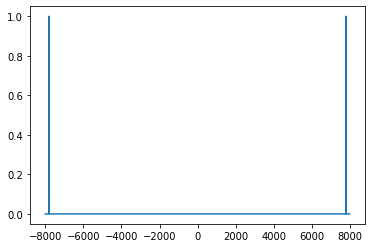

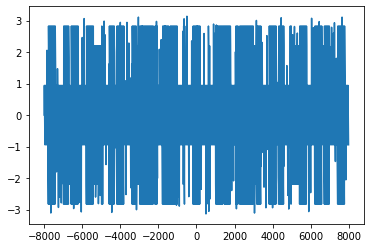

In [9]:
# Afișăm spectrul de amplitudini
magnitude_spectrum = np.abs(sine_fft)
# Axa de frecvențe oX
frequency_axis = np.arange(-len(sinewave)//2,\
            len(sinewave)//2)*fs/len(sinewave)
pl.plot(frequency_axis, magnitude_spectrum);

# Afișăm spectrul de faze
pl.figure()
phase_spectrum = np.angle(sine_fft)
pl.plot(frequency_axis, phase_spectrum);

Se pot observa următoarele: 

> spectrul de amplitudini este simetric față de origine. Acest lucru se datorează faptului că secvența de intrare a FFT, sinusul, este o secvență reală. În practică se va afișa doar jumătatea superioară (frecvențele pozitive) ale spectrului de amplitudini.

> spectrul de faze nu oferă prea multe informații la momentul actual și mai mult decât atât pare să nu respecte faza sinusul generat. Problema fazei componentelor spectrale se datorează periodicității unghiului în coordonate polare. Și anume $-2\pi$ este egal cu $2\pi$ astfel că se aplică de obiecei așa numitul proces de *phase unwrapping* în care se ia în considerare faza minimă ce poate genera acea valoare. 

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex2.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">D. Generați două sinusuri cu frecvențe diferite și însumați-le. Afișați FFT pentru acest semnal și verificați frecvențele observate în spectru.
    </td>
</tr>
</table>

>Răspunsul vostru...

### FFT semnalului vocal

Pentru a putea calcula FFT pentru semnalele noastre de intrare, trebuie mai întâi să ajustăm lungimea ferestrei de analiză de 20-40 ms la un număr de eșantioane egal cu o putere a lui 2:

In [10]:
# Fereastra de 20ms
window_length = int(20*1e-3*sampling_frequency)
print ("20ms equals %d samples" %window_length)

# Ajustăm fereastra la o putere a lui 2
window_fft = int(2**np.ceil(np.log2(window_length)))
print ("The FFT-adjusted window length is %d samples" \
       %window_fft)

20ms equals 320 samples
The FFT-adjusted window length is 512 samples


Extragem un cadru de semnal din fiecare vocală:

---



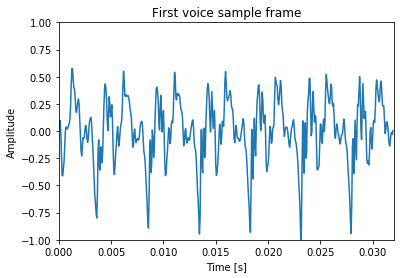

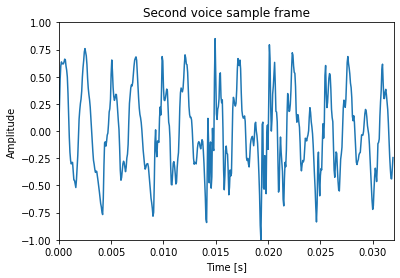

In [11]:
# Fără suprapunere
p = 0

# Luăm primul cadru din ambele semnale
k = 0
current_frame_1 = wav_data_1[int(k*(1-p)*window_fft)\
                    :int((k*(1-p)+1)*window_fft)]
current_frame_2 = wav_data_2[int(k*(1-p)*window_fft)\
                    :int((k*(1-p)+1)*window_fft)]

time_axis = np.arange(0, window_fft)\
        *1.00/sampling_frequency
duration = window_fft*1.00/sampling_frequency

# Primul semnal
pl.figure()
pl.plot(time_axis,current_frame_1)
pl.xlim([0, duration])
pl.ylim([-1, 1])
pl.title('First voice sample frame')
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')
# Al doilea semnal
pl.figure()
pl.plot(time_axis, current_frame_2)
pl.xlim([0, duration])
pl.ylim([-1, 1])
pl.title('Second voice sample frame')
pl.xlabel('Time [s]')
pl.ylabel('Amplitude');

Calculăm FFT pentru cele două cadre:

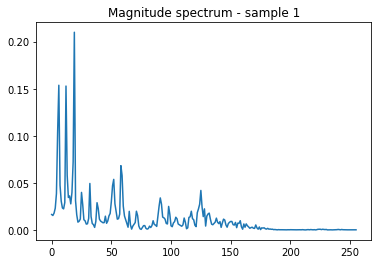

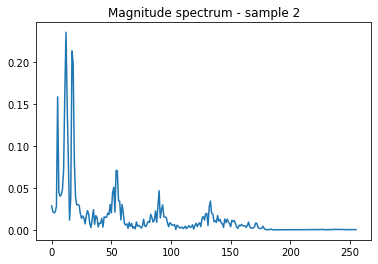

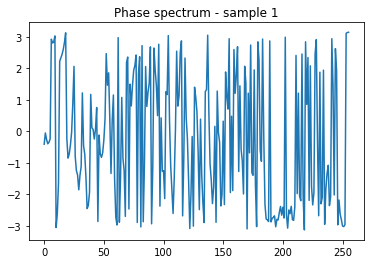

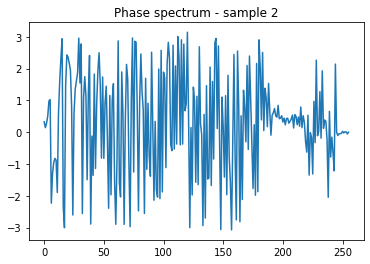

In [12]:
frame_fft_1 = fft(current_frame_1, window_fft) \
        / (window_fft/2.0)
frame_fft_2 = fft(current_frame_2, window_fft) \
        / (window_fft/2.0)

# Spectrul de amplitudini și faze pentru primul cadru
# Vom folosi doar coeficienții corespunzători frecvențelor pozitive
magnitude_spectrum_1 = \
        np.abs(frame_fft_1[len(frame_fft_1)//2:][::-1])
phase_spectrum_1 = \
        np.angle(frame_fft_1[len(frame_fft_1)//2:][::-1])
# Spectrul de amplitudini și faze pentru al doilea cadru
# Vom folosi doar coeficienții corespunzători frecvențelor pozitive
magnitude_spectrum_2 = \
        np.abs(frame_fft_2[len(frame_fft_1)//2:][::-1])
phase_spectrum_2 = \
        np.angle(frame_fft_2[len(frame_fft_1)//2:][::-1])

pl.figure()
pl.plot(magnitude_spectrum_1)
pl.title("Magnitude spectrum - sample 1")

pl.figure()
pl.plot(magnitude_spectrum_2)
pl.title("Magnitude spectrum - sample 2")


pl.figure()
pl.plot(phase_spectrum_1)
pl.title("Phase spectrum - sample 1")

pl.figure()
pl.plot(phase_spectrum_2)
pl.title("Phase spectrum - sample 2");

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex1.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">E. Ce ne spun plot-urile?
    </td>
</tr>
</table>

>Răspunsul vostru...

Haideți să vizualizăm rezultatele FFT folosind și o funcție specializată din modulul `matplotlib` și să utilizăm și o scară logaritmică pe axa oY pentru a comprima domeniul de valori de pe aceasta:

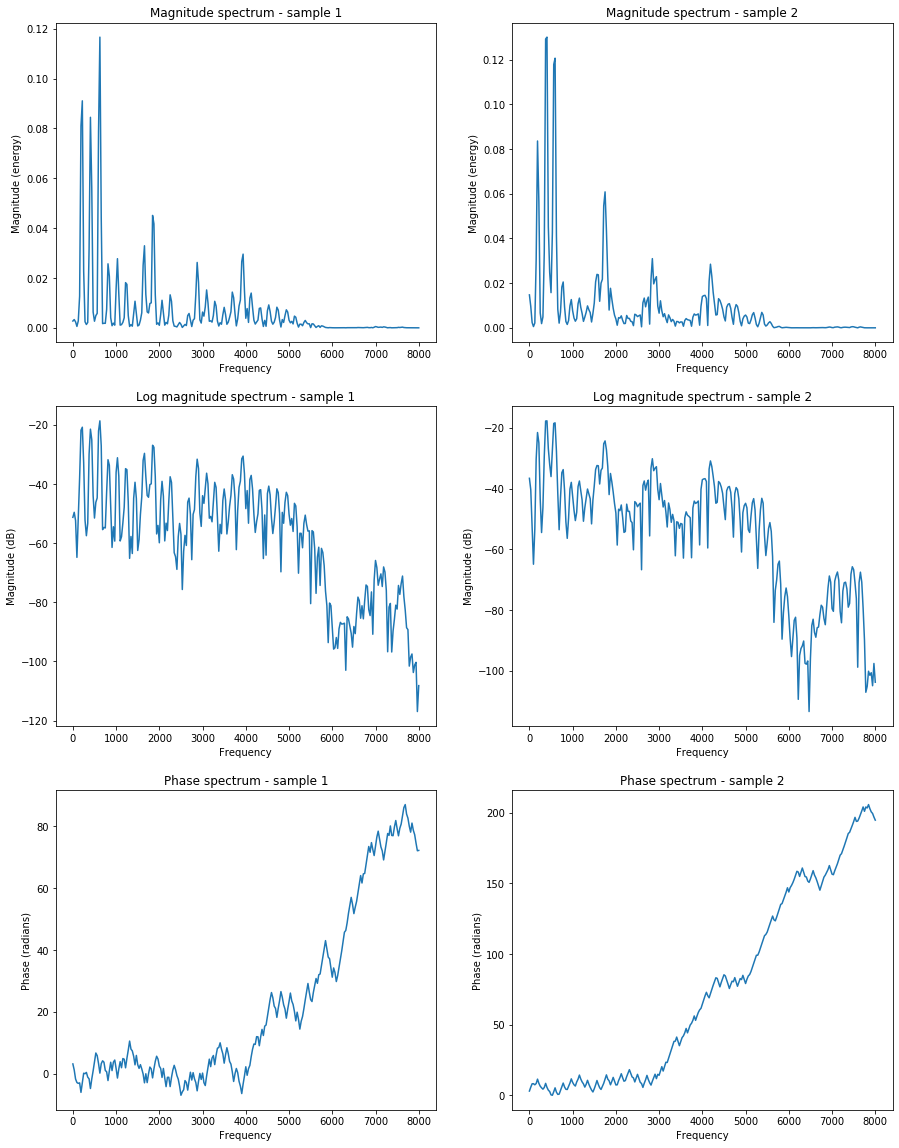

In [13]:
pl.figure(figsize=(15,20))

# Primul sample
pl.subplot(3,2,1)
pl.magnitude_spectrum(current_frame_1, \
            Fs = sampling_frequency)
pl.title ("Magnitude spectrum - sample 1")

pl.subplot(3,2,3)
pl.magnitude_spectrum(current_frame_1, \
            Fs = sampling_frequency, scale = 'dB')
pl.title ("Log magnitude spectrum - sample 1")

pl.subplot(3,2,5)
A = pl.phase_spectrum(current_frame_1, \
            Fs = sampling_frequency)
pl.title ("Phase spectrum - sample 1")


# Al doilea cadru
pl.subplot(3,2,2)
pl.magnitude_spectrum(current_frame_2, \
            Fs = sampling_frequency)
pl.title ("Magnitude spectrum - sample 2")

pl.subplot(3,2,4)
pl.magnitude_spectrum(current_frame_2, \
            Fs = sampling_frequency, scale = 'dB')
pl.title ("Log magnitude spectrum - sample 2")

pl.subplot(3,2,6)
pl.phase_spectrum(current_frame_2, \
            Fs = sampling_frequency)
pl.title ("Phase spectrum - sample 2");

Se poate observa faptul că funcția dedicată spectrului de faze din cadrul modulului `matplotlib` utilizează  radiani pentru valorile fazei și aplică și procesul de phase unwrapping. 


> **(OBS)** Ar trebui să  fie clar faptul că în spectru de amplitudini componentele cu amplitudini diferite de 0 se regăsesc la valori multipli ai frecvenței fundamentale = *armonici*. 

> **OBS** Valoarea maximă a frecvenței prezente în spectru este jumătate din frecvența de eșantionare conform teoremei lui Nyquist. 



<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex2.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">H. Spectrele celor două vocale sunt mai apropiate decât forma lor de undă?
    </td>
</tr>
</table>

>Răspunsul vostru...

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex6.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">I. Puteți determina frecvența fundamentală din spectru? Ce valoare are aceasta pentru fiecare vocală? Comparați cu rezultatele de la autocorelație sau AMDF.
    </td>
</tr>
</table>

>Răspunsul vostru...

Ca să fie și mai evidentă asemănarea celor două spectre de amplitudini a semnalelor, putem să le afișăm suprapuse:

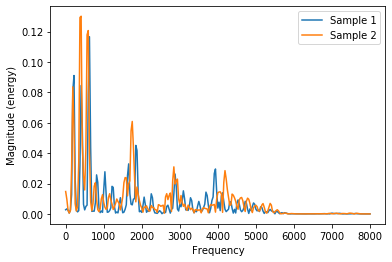

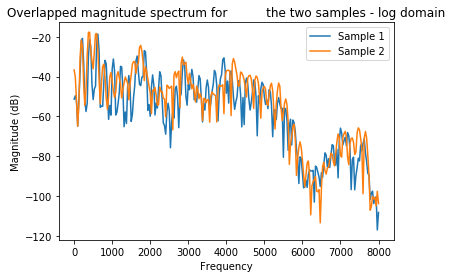

In [14]:
pl.magnitude_spectrum(current_frame_1, \
                Fs = sampling_frequency);
pl.magnitude_spectrum(current_frame_2, \
                Fs = sampling_frequency);
pl.legend(["Sample 1", "Sample 2"])

pl.figure()
pl.magnitude_spectrum(current_frame_1, \
        Fs = sampling_frequency, scale = 'dB');
pl.magnitude_spectrum(current_frame_2, 
        Fs = sampling_frequency, scale = 'dB');
pl.title("Overlapped magnitude spectrum for \
         the two samples - log domain");
pl.legend(["Sample 1", "Sample 2"]);

## Influența tipului ferestrei de analiză în domeniul spectral

Ne reamintim faptul că într-un tutorial anterior am afișat spectrele diferitelor tipuri de ferestre de analiză și am discutat despre fenomenul de spectral leakage. Să vedem acum cum afectează utilizarea unei ferestre de analiză ponderate spectrul semnalului. Să folosim o fereastră Hamming:

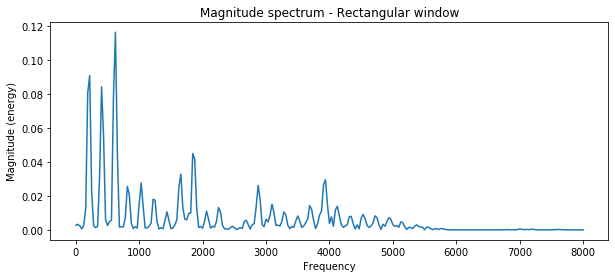

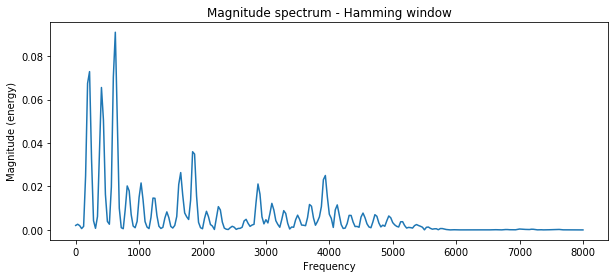

In [15]:
# Aplicăm Hamming asupra cadrului de semnal
hamming_frame = current_frame_1 * \
            np.hamming(window_fft)

# Calculăm FFT
frame_fft = fft(current_frame_1, window_fft) \
            / (window_fft/2.0)
hamming_frame_fft = fft(hamming_frame, window_fft) \
            / (window_fft/2.0)

# Afișăm rezultatele
pl.figure(figsize=(10,4))
pl.magnitude_spectrum(current_frame_1, \
            Fs = sampling_frequency)
pl.title ("Magnitude spectrum - Rectangular window")

pl.figure(figsize=(10,4))
pl.magnitude_spectrum(hamming_frame, \
            Fs = sampling_frequency)
pl.title ("Magnitude spectrum - Hamming window");


<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex2.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">J. S-a modificat spectrul odată cu modificarea tipului ferestrei de analiză? Motivați răspunsul.
    </td>
</tr>
</table>

>Răspunsul vostru...

## Inversa FFT

**Transformata Fourier inversă** va recompune semnalul în domeniul timp pornind de la coeficienții Fourier și este definită astfel :

>$x_{n}={\frac {1}{N}}\sum _{k=0}^{N-1}X_{k}\cdot e^{i2\pi kn/N}$

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex2.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">K. Ce se întâmplă dacă inversăm rezultatele FFT? Ce vom obține?
    </td>
</tr>
</table>

>Răspunsul vostru...

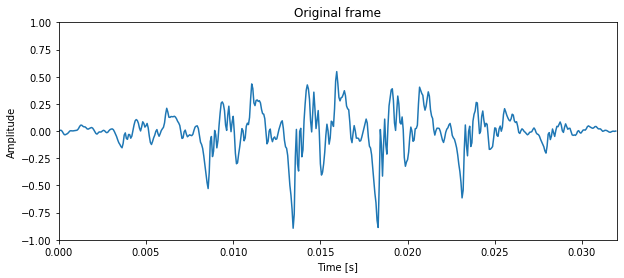

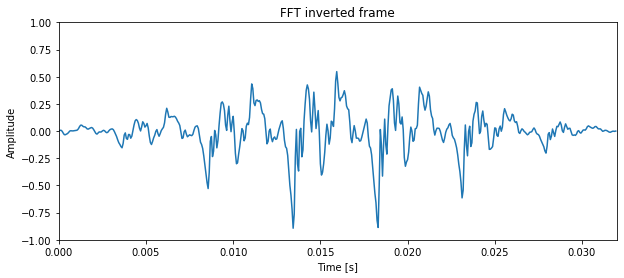

In [16]:
from scipy import ifft

# aplicăm IFFT asupra cadrului Hamming
inv_frame =ifft(hamming_frame_fft)

# afișăm rezultatele
pl.figure(figsize=(10,4))

time_axis = np.arange(0, window_fft)\
            *1.00/sampling_frequency
duration = window_fft*1.00/sampling_frequency

# cadrul original

pl.plot(time_axis,hamming_frame)
pl.xlim([0, duration])
pl.ylim([-1, 1])
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')
pl.title('Original frame')


# cadrul inversat
pl.figure(figsize=(10,4))
pl.plot(time_axis,window_fft/2*inv_frame.real)
pl.xlim([0, duration])
pl.ylim([-1, 1])
pl.xlabel('Time [s]')
pl.ylabel('Amplitude')
pl.title('FFT inverted frame');


Se poate observa că dacă nu am modificat în vreun fel coeficienții Fourier calculați anterior, rezultatul inversei FFT va fi identic cu semnalul original.

# Aplicații FFT: spectrograma

Vizualizarea spectrului de amplitudini al unui semnal vocal oferă informații suplimentare referitoare la conținutul acestuia, precum și informații privind periodicitatea sau aperiodicitatea segmentului vocal analizat. Este util însă în aplicații mai complexe să se analizeze nu doar spectrul instantaneu, ci și evoluția sa în timp. Această vizualizare timp-frecvență este denumită **spectrogramă**. Fiecare punct din această spectrogramă oferă informații referitoare la amplitudinea $A_i$ a unei componente de frecvență $f_i$ la momentul de timp $t_j$. Axa oX reprezintă **axa timpului**, axa oY **axa frecvențelor**, iar nivelele de gri sau culoarea dau amplitudinea normalizată a componentei de frecvență.

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex1.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">L. Ce credeți? Care este frecvența maximă pe care o putem afișa într-o spectrogramă? Dar timpul maxim?
    </td>
</tr>
</table>

>Răspunsul vostru...

Să afișăm o spectrogramă folosind funcția `specgram` a modulului `matplotlib`. Vom folosi un semnal de durată mai mare pentru a putea interpreta informația mai ușor:

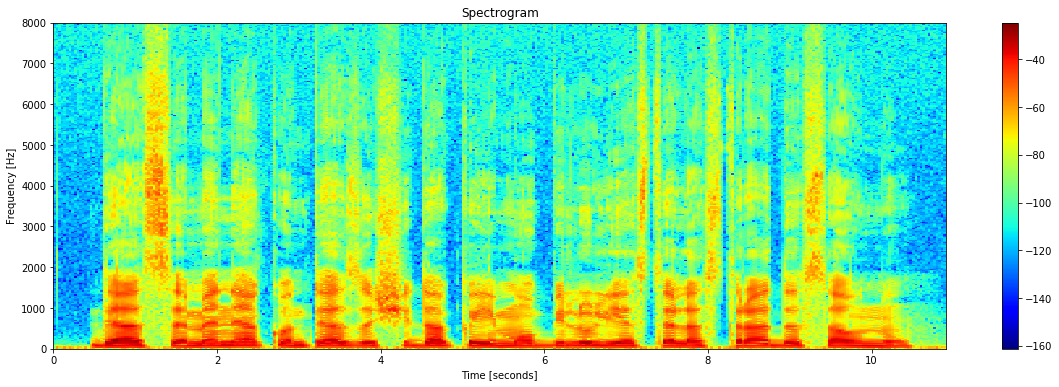

In [17]:
from scipy.io.wavfile import read
from scipy import signal
from matplotlib import rcParams
# Utilizăm un set de culori specific
rcParams['image.cmap'] = 'jet'


input_wav_file = 'speech_files/adr_rnd1_001.wav'
wav_struct = wave.open(input_wav_file, 'r')
wav_bytes = wav_struct.readframes(-1)
wav_data = np.frombuffer(wav_bytes, dtype='int16')
wav_data = wav_data/float(max(abs(wav_data)))

# Plotăm spectrograma
pl.figure(figsize=(20,6))
pl.specgram(wav_data, NFFT=512, \
     Fs=sampling_frequency, noverlap=0, scale = 'dB')
pl.colorbar()
pl.title("Spectrogram")
pl.ylabel("Frequency [Hz]")
pl.xlabel("Time [seconds]");

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex1.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">M. Cum se poate interpreta informația din spectrogramă? Puteți identifica anumite foneme pe baza ei? Sau marginile fonemelor?
    </td>
</tr>
</table>

>Răspunsul vostru...

Din simpla vizualizare a spectrogramei unui semnal vocal putem obține o serie de informații legate de conținutul acestuia. Cum ar fi prezența vocalelor dată de periodicitatea pe verticală sau energia mai mare acestora evidențiată de nivelel de roșu din reprezentare.

Pe de altă parte putem aproxima și marginile fonemelor într-o oarecare măsură: modificările bruște sau discontinuitățile din reprezentare pot indica aceste tranziții dintre foneme. Este important de menționat faptul că foneticienii exeperimentați pot să recunoască identitatea fonemelor direct din spectrogramă. 

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex1.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">N. Modificați parametrul NFFT din funcția specgram la valorile 32 și 2048. Ce se întâmplă? Cum explicați modificările apărute în spectrogramă?
    </td>
</tr>
</table>

>Răspunsul vostru...

**Rezoluția în frecvență**

În momentul în care alegem numărul de eșantioane pe baza cărora se va calcula FFT, implicit stabilim și rezoluția în frecvență a acesteia. Știind că frecvența maximă din spectrul unui semnal este egală cu jumătate din frecvența de eșantionare, putem calcula rezoluția în frecvență a FFT-ului. 

De exemplu, dacă avem un semnal eșantionat la 16kHz și îl analizăm pe cadre de lungime 512 eșantioane, rezoluția în frecvență este egală cu:

$ \Delta f=16000 \div 2 \div 512 \approx 15.6~Hz$ 

Ceea ce însemnă că noi vom putea calcula amplitudinile componentelor spectrale doar la multipli ai acestei rezoluții. Dacă dorim o rezoluție mai bună trebuie să mărim numărul de puncte FFT și implicit lungimea ferestrei. Însă, dacă luăm cadre de analiză mai lungi, pierdem din rezoluția în timp. Astfel că este întodeauna necesar să realizăm un compromis între rezoluția în timp și rezoluția în frecvență a reprezentării spectrale și în special a spectrogramei sau să utilizăm cadre de analiză cu grad de suprapunere mare. Acest lucru s-a întâmplat și în cadrul exercițiului anterior unde am vizualizat spectrograma pentru diferite valori ale lui NFFT. 

# Aplicații FFT: bancuri de filtre

O altă aplicație importantă a FFT este de a proiecta așa numitele **bancuri de filtre**. Acestea sunt seturi 
de filtre de lungime fixă sau variabilă ce acoperă întreg domeniul de frecvențe al unui semnal. Bancurile de filtre sunt utilizate pentru a comprima sau analiza informația conținută de semnal prin medierea spectrului din benzile respective de frecvență.

Cel mai utilizat banc de filtre în prelucrarea semnalului vocal este **bancul de filtre Mel**. Scala de frecvențe neliniară Mel este bazată pe caracteristicile psiho-acustice ale auzului uman, iar un Mel este definit ca:

> $m=2595log_{10}(1+\frac{f}{700})=1127 \dot ln(1+\frac{f}{700})~[Mel]$ 

Pentru a reveni la domeniul de frecvențe liniar utilizăm formula:

> $f=700(10^\frac{m}{2595}-1)=700({e}^\frac{m}{1127}-1)~[Hz]$ 

Mai multe informații aici: https://en.wikipedia.org/wiki/Mel_scale


Să afișăm un astfel de banc de filtre:

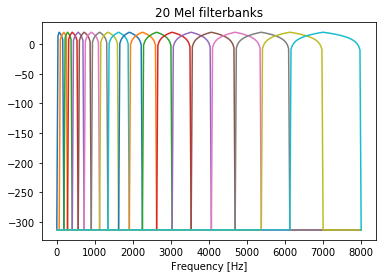

In [18]:
# 20 filtre
nfilt=20
NFFT = 512
pow_frames = 10
low_freq_mel = 0

# Convertim Hz la Mel
high_freq_mel = (2595 * \
    np.log10(1 + (sampling_frequency / 2) / 700)) 

# Filtre egal distanțate pe scală Mel
mel_points = np.linspace(low_freq_mel, \
                high_freq_mel, nfilt + 2)  

# Convertim Mel în Hz
hz_points = (700 * (10**(mel_points \
                / 2595) - 1))  
bin = np.floor((NFFT + 1) * hz_points \
                / sampling_frequency)

# Bancul de filtre
fbank = np.zeros((nfilt, \
            int(np.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   
    f_m = int(bin[m])             
    f_m_plus = int(bin[m + 1])  

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) \
            / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) \
            / (bin[m + 1] - bin[m])
filter_banks = np.dot(pow_frames, fbank.T)

# Stabilitate numerică
filter_banks = np.where(filter_banks == 0,\
        np.finfo(float).eps, filter_banks)

# Afișăm în dB
filter_banks = 20 * np.log10(filter_banks)  
freq_axis = np.arange(0, NFFT//2+1)\
        *sampling_frequency/NFFT
pl.plot(freq_axis, filter_banks)
pl.xlabel("Frequency [Hz]")
pl.title ("20 Mel filterbanks");

Se poate observa că pe baza scalei Mel de frecvențe, în domeniul liniar vom obține benzi de frecvență foarte înguste în zona joasă-medie și benzi de frecvență mai largi în zona frecvențelor înalte. Acest lucru înseamnă că utilizăm o rezoluție de procesare mai bună în domeniul de frecvențe în care urechea umană este mai sensibilă și putem să reducem informația mai mult în domeniul în care nu este atât de sensibilă. 

# Filtrul de pre-accentuare

Deoarece aerul introduce o atenuare de 6dB/octavă asupra sunetelor, atunci când facem înregistrări ale semnalului vocal, această atenuare se va traduce într-o pantă descrescătoare a spectrului (en. *spectral tilt*) și o reprezentare incorectă a frecvențelor medii și înalte inițiale. 

Astfel că, un prim pas de pre-procesare în orice aplicație de voce este acela de a aplica un filtru de **pre-accentuare** asupra semnalului. Acest filtru este de tip trece sus și de cele mai multe ori de ordin întâi.

Să proiectăm un astfel de filtru și să-i afișăm caracteristica de transfer:

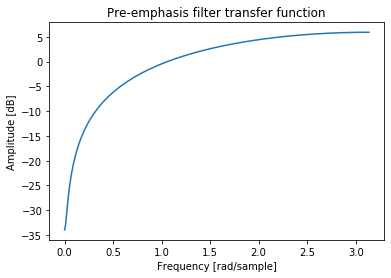

In [19]:
from scipy.signal import freqz

# Coeficienții filtrului
b = [1, -0.98]
a = [1]

# Calculăm răspunsul filtrului în domeniul Z
w,h = freqz(b,a)

pl.plot(w, 20 * np.log10(abs(h)))
pl.title("Pre-emphasis filter transfer function")
pl.ylabel('Amplitude [dB]')
pl.xlabel('Frequency [rad/sample]');

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex1.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">O. Modificați valoarea celui de-al doilea coeficient $b_k$  la 0.92 și 0.95 și afișați rezultatele. Cum se modifică funcția de transfer a filtrului?
    </td>
</tr>
</table>

>Răspunsul vostru...

Să vedem ce se întâmplă dacă aplicăm acest filtru asupra unui semnal vocal:

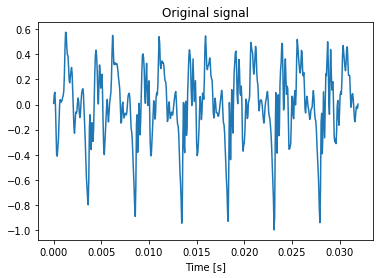

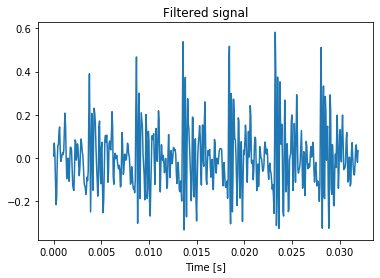

In [20]:
from scipy.signal import lfilter

# Filtram una dintre vocale
filtered_data = lfilter(b, a, wav_data_1)

# Afișăm doar câteva eșantioane 
# pentru a observa efectul filtrului
pl.figure()
pl.plot(time_axis,wav_data_1[:window_fft])
pl.xlabel("Time [s]")
pl.title("Original signal")
pl.figure()
pl.plot(time_axis,filtered_data[:window_fft])
pl.xlabel("Time [s]")
pl.title ("Filtered signal");

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex4.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">P. Ce s-a modificat în semnal? Este același? Ascultați semnalul filtrat.
    </td>
</tr>
</table>

>Răspunsul vostru...

<table style="width:100%">
<tr style="color:#FF5733; font-weight:bold">
    <td style="width:6%">
        <img src='images/ex5.png' width=50 align="left"> </td>
    <td style="text-align:left; font-size:1.2em">Q. Cum se modifică spectrul semnalului? Afișați spectrul pentru semnalul original și cel filtrat și interpretați rezultatele.
    </td>
</tr>
</table>

>Răspunsul vostru...

# Concluzii

În acest tutorial am introdus analiza în frecvență a semnalului vocal--una dintre cele mai importante transformări utilizate în procesările de voce. Am afișat spectrul și spectrograma, am prezentat scala de frecvențe neliniară Mel, precum și ce înseamnă un banc de filtre sau filtrul de pre-accentuare.

În următorul tutorial vom discuta despre cepstrum.